<a href="https://colab.research.google.com/github/djcardona89/03MAIR_Algoritmos-de-Optimizacion/blob/main/Seminario_Algoritmos_Optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: David Jose Cardona Guzman  <br>
Url: https://colab.research.google.com/drive/1aPeTvl1iqUaa4ux6BEbaX-RqZlpS-PkL?usp=sharing<br>
Problema:
> 1. Elección de grupos de población homogéneos <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice
la audiencia.

Los horarios disponibles se conocen a priori y son los siguientes:<br>

*   Viernes 20
*   Sábado 12,16,18,2
*   Domingo 12,16,18,20
*   Lunes 20


<br>
En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia) Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C. <br>
Se conoce estadisticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos).<br>
<br>
Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce
según los siguientes coeficientes:<br>

*   Viernes20h: 0.4
*   Sábado12h: 0.55 , Sábado16h: 0.7 , Sábado18h: 0.8, Sábado20h: 1
*   Domingo12h: 0.45 ,Domingo16h: 0.75 , Domingo18h: 0.5 , Domingo20h: 1
*   Lunes20h: 0.4
<br>

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes<br>
<br>
Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:<br>
<br>

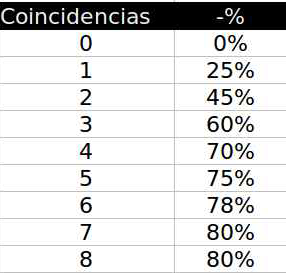

(*) La respuesta es obligatoria

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>


In [15]:
from math import factorial
n = 20 # Número de equipos
posibilidades =((n-1)*n)/2
print("Hay "+str(posibilidades)+" posibilidades, suponiendo que liga se juega a una sola vuelta.")

Hay 190.0 posibilidades, suponiendo que liga se juega a una sola vuelta.


¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

In [16]:
n_horarios = 10 # Número de horarios posibles
posibilidades_n = ((n-1)*n*n_horarios)/2
print("Hay "+str(posibilidades_n)+" posibilidades, teniendo en cuenta las horarios disponibles y suponiendo que liga se juega a una sola vuelta.")

Hay 1900.0 posibilidades, teniendo en cuenta las horarios disponibles y suponiendo que liga se juega a una sola vuelta.


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

Respuesta: La estructura de datos más utilizada durante la resolución del problema, fué la del diccionario. Inicialmente trabajé con listas para definir las variables dadas en el problema, pero más adelante me di cuenta de que tenía más sentido definirlas como llaves de diccionarios para poder acceder a ellas (y a sus valores), de una manera más natural. Sin embargo, a lo largo de la solución, se utilizaron listas para almacenar los valores resultantes de multiplicaciones y ponderaciones. 

Según el modelo para el espacio de soluciones
(*)¿Cual es la función objetivo?



La función objetivo es la sumatoria de la multiplicación entre el valor de base(por categorías entre equipos), la ponderación por el horario en el que se efectúa el partido, y la correción por coincidencia.<br>
$\sum_{i=1}^{n}(Base(Mill)*(Ponderacion)*(Correccion)$ , donde n es el número de partidos por jornada (10).

(*)¿Es un problema de maximización o minimización?

Respuesta: Es un problema de maximización, ya que se busca el valor máximo de audiencia por jornada.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

In [17]:
import numpy as np
import random

# Lista con todos los equipos
equipos = ['A1','A2','A3','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','C1','C2','C3','C4','C5','C6']

# Creamos un diccionario para definir la cantidad de espectadores por categoría de equipos
categoria = {'AA':2,'AB':1.3,'AC':1,'BB':0.9,'BC':0.75,'CC':0.47,'BA':1.3,'CB':0.75,'CA':1}

# Creamos un diccionario para definir la disminución de espectadores por horario
horarios={'V20':0.4,'S12':0.55,'S16':0.7,'S18':0.8,'S20':1,'D12':0.45,'D16':0.75,'D18':0.5,'D20':1,'L20':0.4}

# Reducción de audiencia por coincidencia de horario
coincidencia = {'0':0,'1':0.25,'2':0.45,'3':0.6,'4':0.7,'5':0.75,'6':0.78,'7':0.8,'8':0.8}

#Creo matriz de partidos por jornada
jornadas = [] # Cada elemento de jornadas contiene cada uno de los partidos

# Definimos la primera jornada
jornadas.append([[equipos[i],equipos[i+1]] for i in range(0,int(len(equipos))-1,2)]) 

# Función para identificar los partidos que coinciden en el mismo horario
def contarElementosLista(lista):
    return {i:lista.count(i)-1 for i in lista}

equipos_t = []
base = 0

for j in range(int(len(equipos)/2)):
    # Rotamos los equipos para que en cada jornada, cada uno se enfrente con un contrincante diferente
    equipos_t.append([[jornadas[j][i][1],jornadas[j][i][0]] for i in range(int(len(equipos)/2))])
    
    # Se definen todos los partidos para la jornada
    jornadas.append([[equipos_t[j][i][1],equipos_t[j][i-(int(len(equipos)/2)-1)][0]] for i in range(int(len(equipos)/2))])
        
    # BÚSQUEDA ALEATORIA
    audiencia_mayor=0
    hora_mayor=[]
    hora_mayor_2=[]
    for p in range(10): # Generamos 10 listas aleatorias de horario
        dism=[] # Lista que almacena el producto base*ponderación
        hora=[]
        base =[]
        for k in range(len(jornadas[j])):
            equipo=[]
            partido=[] # Lista que almacena los contrincantes por partido

            for e in range(len(jornadas[j][k])):
                equipo.append(jornadas[j][k][e][0])
            partido=(equipo[0]+equipo[1])
            base.append(categoria[partido]) # Base por la categoría de los equipos
            h, ponderacion = random.choice(list(horarios.items())) # Tomo un horario al azar (Búsqueda aleatoria)
            hora.append(h)
            dism.append(base[k]*ponderacion)
            
        # Asignación obligatoria de un partido el Viernes y uno el Sábado
        if 'V20' not in hora:
            hora[-1] = 'V20'
        if 'L20' not in hora:
            hora[-2] = 'L20'

        # Diccionario con la cantidad de partidos jugados por horario
        rep = contarElementosLista(hora) 

        # Lista con las keys del diccionario 'coincidencia'
        k_coin = [''+str(rep[hora[i]])+'' for i in range(len(hora))] 

        # Factor de reducción por coincidencia de horarios (values del diccionario 'coincidencia')
        corr = [coincidencia[k_coin[i]] for i in range(len(k_coin))]

        # Lista con la audiencia para cada partido
        audiencia_partido = [dism[i]*(1-corr[i]) for i in range(len(corr))]

        # Lista con la audiencia total por jornada
        audiencia_jornada = sum(audiencia_partido)
        
        # Nos quedamos con el mayor valor de audiencia resultante después de las 300 iteraciones
        if audiencia_jornada > audiencia_mayor:
            audiencia_mayor = audiencia_jornada
            hora_mayor = hora
    
    # BÚSQUEDA LOCAL
    if ('S20' in hora_mayor and 'D20' in hora_mayor):
        hora_mayor[hora_mayor.index('V20')],hora_mayor[hora_mayor.index('S20')] =hora_mayor[hora_mayor.index('S20')],hora_mayor[hora_mayor.index('V20')]
        hora_mayor[hora_mayor.index('L20')],hora_mayor[hora_mayor.index('D20')] =hora_mayor[hora_mayor.index('D20')],hora_mayor[hora_mayor.index('L20')]
        val=[]
        
        for hora in hora_mayor:
            val.append(horarios[hora]) # Ponderación por horario
        
        repe = contarElementosLista(hora_mayor) # Indica la cantidad de veces que se repite un horario
        dism_2 = [base[i]*val[i] for i in range(len(base))] # Base*ponderacion
        
        # Lista con las keys del diccionario 'coincidencia'
        k_coin_2 = [''+str(repe[hora_mayor[i]])+'' for i in range(len(hora_mayor))] 
        
        # Factor de reducción por coincidencia de horarios (values del diccionario 'coincidencia')
        corr_2 = [coincidencia[k_coin_2[i]] for i in range(len(k_coin_2))]
        
        # Lista con la audiencia para cada partido
        audiencia_partido_2 = [dism_2[i]*(1-corr_2[i]) for i in range(len(corr_2))]
        audiencia_jornada_2 = sum(audiencia_partido_2)
        
        if audiencia_jornada_2 > audiencia_mayor:
            audiencia_mayor = audiencia_jornada_2
            hora_mayor_2 = hora_mayor
            print("La jornada "+ str(j+1) +" consta de los siguientes enfrentamientos: \n" + str(jornadas[j]))
            print("La asignación de horarios para cada uno de los partidos, es :\n" + str(hora_mayor_2))
            print("La mayor audiencia conseguida para ésta jornada, es: "+str(audiencia_mayor)+"\n")
        
    print("La jornada "+ str(j+1) +" consta de los siguientes enfrentamientos: \n" + str(jornadas[j]))
    print("La asignación de horarios para cada uno de los partidos, es :\n" + str(hora_mayor))
    print("La mayor audiencia conseguida para ésta jornada, es: "+str(audiencia_mayor)+"\n")

La jornada 1 consta de los siguientes enfrentamientos: 
[['A1', 'A2'], ['A3', 'B1'], ['B2', 'B3'], ['B4', 'B5'], ['B6', 'B7'], ['B8', 'B9'], ['B10', 'B11'], ['C1', 'C2'], ['C3', 'C4'], ['C5', 'C6']]
La asignación de horarios para cada uno de los partidos, es :
['S18', 'S12', 'L20', 'D20', 'V20', 'S20', 'S12', 'D12', 'S20', 'D12']
La mayor audiencia conseguida para ésta jornada, es: 5.47225

La jornada 2 consta de los siguientes enfrentamientos: 
[['A1', 'B1'], ['A3', 'B3'], ['B2', 'B5'], ['B4', 'B7'], ['B6', 'B9'], ['B8', 'B11'], ['B10', 'C2'], ['C1', 'C4'], ['C3', 'C6'], ['C5', 'A2']]
La asignación de horarios para cada uno de los partidos, es :
['D12', 'D18', 'L20', 'D16', 'S18', 'V20', 'S12', 'S20', 'D20', 'S18']
La mayor audiencia conseguida para ésta jornada, es: 5.6385000000000005

La jornada 3 consta de los siguientes enfrentamientos: 
[['A1', 'B3'], ['A3', 'B5'], ['B2', 'B7'], ['B4', 'B9'], ['B6', 'B11'], ['B8', 'C2'], ['B10', 'C4'], ['C1', 'C6'], ['C3', 'A2'], ['C5', 'B1']]
La

Éste algoritmo mejora la complejidad, debido a que evita hacer el cruce de todos los partidos de cada jornada, con cada uno de los horarios,hasta encontrar el más óptimo. En lugar de lo anterior, se utiliza una búsqueda aleatoria para buscar el valor máximo de audiencia, y posteriormente una búsqueda local.

(*)Calcula la complejidad del algoritmo 

Respuesta: La complejidad es $n^3+n^2$

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

In [21]:
equipos = [random.choice(list(equipos)) for i in range(len(equipos))]
print(equipos)

['C6', 'C1', 'B7', 'B3', 'B8', 'A2', 'B6', 'C1', 'B6', 'A1', 'B3', 'B4', 'B5', 'B10', 'A2', 'B9', 'B7', 'A2', 'B7', 'B10']


Aplica el algoritmo al juego de datos generado

In [22]:
import numpy as np
import random

# Lista con todos los equipos
#equipos = ['A1','A2','A3','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','C1','C2','C3','C4','C5','C6']

# Creamos un diccionario para definir la cantidad de espectadores por categoría de equipos
categoria = {'AA':2,'AB':1.3,'AC':1,'BB':0.9,'BC':0.75,'CC':0.47,'BA':1.3,'CB':0.75,'CA':1}

# Creamos un diccionario para definir la disminución de espectadores por horario
horarios={'V20':0.4,'S12':0.55,'S16':0.7,'S18':0.8,'S20':1,'D12':0.45,'D16':0.75,'D18':0.5,'D20':1,'L20':0.4}

# Reducción de audiencia por coincidencia de horario
coincidencia = {'0':0,'1':0.25,'2':0.45,'3':0.6,'4':0.7,'5':0.75,'6':0.78,'7':0.8,'8':0.8}

#Creo matriz de partidos por jornada
jornadas = [] # Cada elemento de jornadas contiene cada uno de los partidos

# Definimos la primera jornada
jornadas.append([[equipos[i],equipos[i+1]] for i in range(0,int(len(equipos))-1,2)]) 

# Función para identificar los partidos que coinciden en el mismo horario
def contarElementosLista(lista):
    return {i:lista.count(i)-1 for i in lista}

equipos_t = []
base = 0

for j in range(int(len(equipos)/2)):
    # Rotamos los equipos para que en cada jornada, cada uno se enfrente con un contrincante diferente
    equipos_t.append([[jornadas[j][i][1],jornadas[j][i][0]] for i in range(int(len(equipos)/2))])
    
    # Se definen todos los partidos para la jornada
    jornadas.append([[equipos_t[j][i][1],equipos_t[j][i-(int(len(equipos)/2)-1)][0]] for i in range(int(len(equipos)/2))])
        
    # BÚSQUEDA ALEATORIA
    audiencia_mayor=0
    hora_mayor=[]
    hora_mayor_2=[]
    for p in range(10): # Generamos 10 listas aleatorias de horario
        dism=[] # Lista que almacena el producto base*ponderación
        hora=[]
        base =[]
        for k in range(len(jornadas[j])):
            equipo=[]
            partido=[] # Lista que almacena los contrincantes por partido

            for e in range(len(jornadas[j][k])):
                equipo.append(jornadas[j][k][e][0])
            partido=(equipo[0]+equipo[1])
            base.append(categoria[partido]) # Base por la categoría de los equipos
            h, ponderacion = random.choice(list(horarios.items())) # Tomo un horario al azar (Búsqueda aleatoria)
            hora.append(h)
            dism.append(base[k]*ponderacion)
            
        # Asignación obligatoria de un partido el Viernes y uno el Sábado
        if 'V20' not in hora:
            hora[-1] = 'V20'
        if 'L20' not in hora:
            hora[-2] = 'L20'

        # Diccionario con la cantidad de partidos jugados por horario
        rep = contarElementosLista(hora) 

        # Lista con las keys del diccionario 'coincidencia'
        k_coin = [''+str(rep[hora[i]])+'' for i in range(len(hora))] 

        # Factor de reducción por coincidencia de horarios (values del diccionario 'coincidencia')
        corr = [coincidencia[k_coin[i]] for i in range(len(k_coin))]

        # Lista con la audiencia para cada partido
        audiencia_partido = [dism[i]*(1-corr[i]) for i in range(len(corr))]

        # Lista con la audiencia total por jornada
        audiencia_jornada = sum(audiencia_partido)
        
        # Nos quedamos con el mayor valor de audiencia resultante después de las 300 iteraciones
        if audiencia_jornada > audiencia_mayor:
            audiencia_mayor = audiencia_jornada
            hora_mayor = hora
    
    # BÚSQUEDA LOCAL
    if ('S20' in hora_mayor and 'D20' in hora_mayor):
        hora_mayor[hora_mayor.index('V20')],hora_mayor[hora_mayor.index('S20')] =hora_mayor[hora_mayor.index('S20')],hora_mayor[hora_mayor.index('V20')]
        hora_mayor[hora_mayor.index('L20')],hora_mayor[hora_mayor.index('D20')] =hora_mayor[hora_mayor.index('D20')],hora_mayor[hora_mayor.index('L20')]
        val=[]
        
        for hora in hora_mayor:
            val.append(horarios[hora]) # Ponderación por horario
        
        repe = contarElementosLista(hora_mayor) # Indica la cantidad de veces que se repite un horario
        dism_2 = [base[i]*val[i] for i in range(len(base))] # Base*ponderacion
        
        # Lista con las keys del diccionario 'coincidencia'
        k_coin_2 = [''+str(repe[hora_mayor[i]])+'' for i in range(len(hora_mayor))] 
        
        # Factor de reducción por coincidencia de horarios (values del diccionario 'coincidencia')
        corr_2 = [coincidencia[k_coin_2[i]] for i in range(len(k_coin_2))]
        
        # Lista con la audiencia para cada partido
        audiencia_partido_2 = [dism_2[i]*(1-corr_2[i]) for i in range(len(corr_2))]
        audiencia_jornada_2 = sum(audiencia_partido_2)
        
        if audiencia_jornada_2 > audiencia_mayor:
            audiencia_mayor = audiencia_jornada_2
            hora_mayor_2 = hora_mayor
            print("La jornada "+ str(j+1) +" consta de los siguientes enfrentamientos: \n" + str(jornadas[j]))
            print("La asignación de horarios para cada uno de los partidos, es :\n" + str(hora_mayor_2))
            print("La mayor audiencia conseguida para ésta jornada, es: "+str(audiencia_mayor)+"\n")
        
    print("La jornada "+ str(j+1) +" consta de los siguientes enfrentamientos: \n" + str(jornadas[j]))
    print("La asignación de horarios para cada uno de los partidos, es :\n" + str(hora_mayor))
    print("La mayor audiencia conseguida para ésta jornada, es: "+str(audiencia_mayor)+"\n")

La jornada 1 consta de los siguientes enfrentamientos: 
[['C6', 'C1'], ['B7', 'B3'], ['B8', 'A2'], ['B6', 'C1'], ['B6', 'A1'], ['B3', 'B4'], ['B5', 'B10'], ['A2', 'B9'], ['B7', 'A2'], ['B7', 'B10']]
La asignación de horarios para cada uno de los partidos, es :
['S18', 'D18', 'S18', 'S12', 'D18', 'V20', 'L20', 'S20', 'D20', 'S20']
La mayor audiencia conseguida para ésta jornada, es: 6.5195

La jornada 2 consta de los siguientes enfrentamientos: 
[['C6', 'B3'], ['B7', 'A2'], ['B8', 'C1'], ['B6', 'A1'], ['B6', 'B4'], ['B3', 'B10'], ['B5', 'B9'], ['A2', 'A2'], ['B7', 'B10'], ['B7', 'C1']]
La asignación de horarios para cada uno de los partidos, es :
['D16', 'V20', 'L20', 'S20', 'S18', 'D20', 'D18', 'S20', 'D20', 'S20']
La mayor audiencia conseguida para ésta jornada, es: 7.15

La jornada 3 consta de los siguientes enfrentamientos: 
[['C6', 'A2'], ['B7', 'C1'], ['B8', 'A1'], ['B6', 'B4'], ['B6', 'B10'], ['B3', 'B9'], ['B5', 'A2'], ['A2', 'B10'], ['B7', 'C1'], ['B7', 'B3']]
La asignación de 

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta: No ha sido necesario utilizar otras referencias.

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Se podría intentar enfocar la búsqueda local, identificando los 2 partidos con menos audiencia, y ubicarlos en horarios diferentes que aporten mayor audiencia, obviamente tomando en cuenta el factor de corrección por coincidencia. 

# Nueva sección